In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head(3)

hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   
2   151 bis Rue de Rennes 6th arr 75006 Paris France   

   additional_number_of_scoring review_date  average_score  \
0                           581   2/19/2016            8.4   
1                           299   1/12/2017            8.3   
2                            32  10/18/2016            8.9   

                          hotel_name reviewer_nationality  \
0                 The May Fair Hotel      United Kingdom    
1    Mercure London Bloomsbury Hotel      United Kingdom    
2  Legend Saint Germain by Elegancia               China    

       negative_review  review_total_negative_word_counts  \
0             Leaving                                   3   
1       poor breakfast                                  3   
2   No kettle in room                                   6   

   total_number_of_reviews      positive_review  \
0                     1994   Staff were amazing   
1                     1361             location   
2                      406          No Positive   

   review_total_positive_word_counts  \
0                                  4   
1                                  2   
2                                  0   

   total_number_of_reviews_reviewer_has_given  reviewer_score  \
0                                           7            10.0   
1                                          14             6.3   
2                                          14             7.5   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...           531 day   
1  [' Business trip ', ' Couple ', ' Standard Dou...           203 day   
2  [' Leisure trip ', ' Solo traveler ', ' Modern...           289 day   

         lat       lng  
0  51.507894 -0.143671  
1  51.521009 -0.123097  
2  48.845377  2.325643

In [161]:
print(hotels['hotel_address'][0:-1])
cut = list(hotels['hotel_address'][0].split())
print(cut[-1:])

0         Stratton Street Mayfair Westminster Borough Lo...
1         130 134 Southampton Row Camden London WC1B 5AF...
2          151 bis Rue de Rennes 6th arr 75006 Paris France
3         216 Avenue Jean Jaures 19th arr 75019 Paris Fr...
4                 Molenwerf 1 1014 AG Amsterdam Netherlands
                                ...                        
386797    24 Ludgate Hill City of London London EC4M 7DR...
386798    9 Knaresborough Place Kensington and Chelsea L...
386799    Landstra er Hauptstra e 155 03 Landstra e 1030...
386800    29 31 Gower Street Camden London WC1E 6HG Unit...
386801    31 Great Cumberland Place Westminster Borough ...
Name: hotel_address, Length: 386802, dtype: object
['Kingdom']


In [162]:
print(type(hotels['reviewer_nationality'][0]))
import re
print(hotels['hotel_address'][0])

countrified = pd.DataFrame()

def countrifier(string):
    country = ''
    cut = string.split()

    country = cut[-1:]

    country = country[0].removeprefix(' ').removesuffix(' ')
    print(country, 4)

    if country == 'Kingdom':
        country = 'United Kingdom'
    return country

hotels['hotel_country'] = hotels['hotel_address'].apply(countrifier)
print(hotels['hotel_country'].describe(), 'lol')

<class 'str'>
Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom
Kingdom 4
Kingdom 4
France 4
France 4
Netherlands 4
Italy 4
Kingdom 4
Austria 4
Kingdom 4
Kingdom 4
Netherlands 4
Kingdom 4
Kingdom 4
Kingdom 4
Spain 4
Spain 4
Kingdom 4
Kingdom 4
Kingdom 4
Spain 4
Kingdom 4
Kingdom 4
Kingdom 4
Kingdom 4
France 4
Austria 4
Spain 4
Netherlands 4
Netherlands 4
Kingdom 4
Netherlands 4
Kingdom 4
Netherlands 4
Kingdom 4
Kingdom 4
Italy 4
Kingdom 4
Kingdom 4
France 4
Kingdom 4
Spain 4
Spain 4
Netherlands 4
Kingdom 4
France 4
Austria 4
Kingdom 4
Netherlands 4
Spain 4
France 4
Spain 4
Kingdom 4
Kingdom 4
Kingdom 4
France 4
Kingdom 4
Kingdom 4
Austria 4
Italy 4
Kingdom 4
Netherlands 4
Kingdom 4
Austria 4
Italy 4
Netherlands 4
Austria 4
Kingdom 4
Spain 4
Kingdom 4
Kingdom 4
Netherlands 4
Kingdom 4
Kingdom 4
Kingdom 4
Austria 4
Kingdom 4
Kingdom 4
Kingdom 4
Spain 4
Kingdom 4
Kingdom 4
France 4
Netherlands 4
Austria 4
Spain 4
Kingdom 4
France 4
Kingdom 4
Netherlands 4
Italy 4
K

In [163]:
hotels['is_homeland'] = (hotels['hotel_country']==hotels['reviewer_nationality'])
print(hotels['is_homeland'])

0         False
1         False
2         False
3         False
4         False
          ...  
386798    False
386799    False
386800    False
386801    False
386802    False
Name: is_homeland, Length: 386803, dtype: bool


In [164]:
print(hotels['is_homeland'].describe())
print(hotels['hotel_country'].describe())
print(hotels['reviewer_nationality'].describe())

print(hotels['hotel_country'][0])
print(hotels['reviewer_nationality'][0])

count     386803
unique         1
top        False
freq      386803
Name: is_homeland, dtype: object
count             386803
unique                 6
top       United Kingdom
freq              196774
Name: hotel_country, dtype: object
count               386803
unique                 225
top        United Kingdom 
freq                184033
Name: reviewer_nationality, dtype: object
United Kingdom
 United Kingdom 


In [170]:
hotels['is_homeland'] = (hotels['hotel_country']==hotels['reviewer_nationality'])
comp_pd = pd.DataFrame()
comp_pd['nat'], comp_pd['htl'], comp_pd['=='] = hotels['reviewer_nationality'], hotels['hotel_country'], hotels['is_homeland']
display(comp_pd.head(20))

nat             htl     ==
0          United Kingdom   United Kingdom  False
1          United Kingdom   United Kingdom  False
2                   China           France  False
3          United Kingdom           France  False
4                  Poland      Netherlands  False
5                  France            Italy  False
6          United Kingdom   United Kingdom  False
7          United Kingdom          Austria  False
8          United Kingdom   United Kingdom  False
9          United Kingdom   United Kingdom  False
10         United Kingdom      Netherlands  False
11         United Kingdom   United Kingdom  False
12            Switzerland   United Kingdom  False
13         United Kingdom   United Kingdom  False
14               Bulgaria            Spain  False
15                Lebanon            Spain  False
16         United Kingdom   United Kingdom  False
17         United Kingdom   United Kingdom  False
18   United Arab Emirates   United Kingdom  False
19           South Africa            Spain  False

In [79]:
hotels['review_date'] = (pd.to_datetime('2017-08-04')-hotels['review_date']) / np.timedelta64(1, 'D')
print(hotels['review_date'][0])

532.0


In [80]:
X = hotels.fillna(0)
Y = hotels.fillna(0)

In [70]:
#for i in hotels['tags']
def splitter(string):
    string = set(string)

print(type(X['tags'][0]))
print((X['tags'][0]))
X['tags'] = X['tags'].apply(splitter)
all_tags = set()
#for glist in hotels['tags']:
#    a = glist.split(', ')
#    for string in a:
#        all_tags.add(string)
#print('was', len(all_tags))

display(hotels['tags'].describe())

#all_tags = list(all_tags)
#print(all_tags)

#def convert(set):
#    return [*set, ]

#s = set(all_tags)
#print(len(convert(s)))

new_set = set()

import string
for i in all_tags:
    k = i.translate(str.maketrans('','',string.punctuation)).replace('[','').replace(']','').lower()
    new_set.add(k)
#    i = i.replace('[','')
#    i = i.replace(']','')
#    i = i.replace(' \'','')
#    i = i.replace(' ','')

#word_set = set()

#for i in new_set:
#    k = i.split(' ')
#    word_set.update(k)

#print('now', len(new_set))
#print('then', len(word_set))


#word_set.remove('')

#hotels['tags'].describe()

#print(new_set)

<class 'NoneType'>
None


TypeError: 'NoneType' object is not iterable

AttributeError: 'set' object has no attribute 'mode'

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
Y = hotels['reviewer_score'] 

In [ ]:
num_cols = ['total_numbers_of_reviews', 'review_total_negative_word_count','additional_number_of_scoring']

cat_cols = ['average_score', 'lat']

<AxesSubplot:>

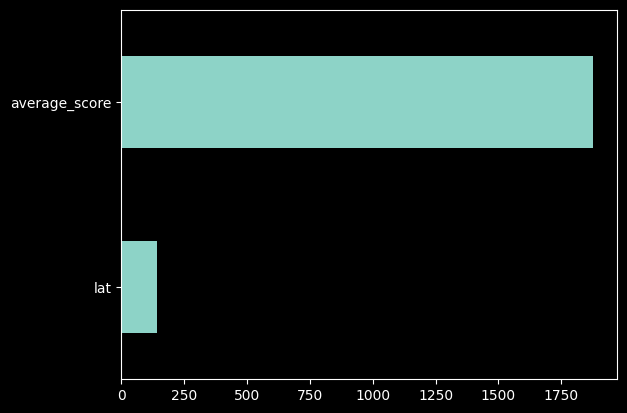

In [ ]:
Y = Y.fillna(0)
X=X.fillna(0)
Y = Y.astype('int')


from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], Y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [ ]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [ ]:
object_columns = [s for s in X.columns if X[s].dtypes == 'object']
X.drop(object_columns, axis = 1, inplace=True)
#X.drop('review_date',axis=1, inplace=True)

In [ ]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1633782276397627


Небольшой бонус:


In [ ]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)